In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
def train_test_split(X, y, percent):
    split = int(len(X)*percent)
    X_train, y_train = X[:split], y[:split]
    X_test, y_test = X[split:], y[split:]
    
    return X_train, y_train, X_test, y_test
    
class LinReg:
    def __init__(self, lr=0.01, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.bias = 0
        self_weights = None
    
    def fit(self, X, y):
        n, features = X.shape
        
        self.weights = np.random.rand(features)
        
        for i in range(self.n_iters):
            y_preds = np.dot(X, self.weights)+self.bias
            
            #gradient descent (derivative of MSE)
            dw = (2*np.dot(X.T, y_preds-y))/n
            db = (2*np.sum(y_preds-y))/n
            
            #weights updating
            self.weights -= self.lr*dw
            self.bias -= self.lr*db
        return [self.weights, self.bias]
    
    def predict(self, X):
        y_preds = np.dot(X, self.weights)+self.bias
        return y_preds

In [115]:
def RMSE(y_true, y_preds):
    return np.mean(y_true-y_preds)

In [102]:
from sklearn import datasets
X, y = datasets.make_regression(n_samples=100, n_features = 1, noise = 15, random_state = 42)

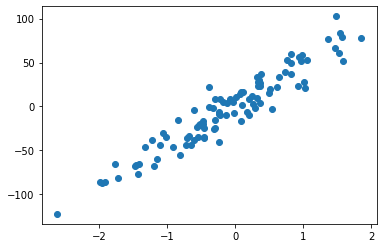

In [103]:
plt.scatter(X, y)

In [104]:
X_train, y_train, X_test, y_test = train_test_split(X, y, 0.8)

In [109]:
lr = LinReg()
lr.fit(X_train, y_train)

[array([45.83844369]), 1.8119347168268378]

In [92]:
lr.predict(X_test)

array([-79.0030822 ,   6.89645361,   9.66719004, -59.07004671,
        50.26877239,  -3.48920256, -19.70804049,   1.19324295,
       -44.61466757,  -4.52588566, -50.94781958,  63.97986693,
         4.90732253, -21.18782727, -19.30302965,  86.71748402,
       -63.49630481, -31.1846035 ,  -1.48889718, -12.36187936])

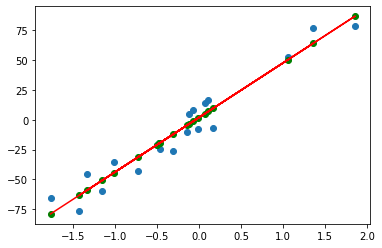

In [121]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, lr.predict(X_test), color = 'green')
plt.plot(X_test, lr.predict(X_test), color = 'red')

In [116]:
RMSE(y_test, lr.predict(X_test))

-0.2936699578142286